#<font color='RoyalBlue'>**Algoritmo Criptográfico de Codificación de Imágenes RGB**</font>

![](https://image.flaticon.com/icons/png/128/1158/1158130.png)


#### <font color='LightBlue'>**Integrantes**<font>
###### Josué David Briceño Urquijo
###### Santiago Sánchez Mora
#### <font color='LightBlue'>**Docente**<font>
###### Francisco Albeiro Gómez Jaramillo
#### <font color='LightBlue'>**Fecha de entrega**<font>
###### 11 de diciembre de 2020


# <font color='LightSkyBlue'>**Introducción**</font>
La seguridad criptográfica se ha vuelto un factor importante para el mundo de las comunicaciones, tanto físicas como digitales. Incluso, por motivos de la vigente pandemia, una gran cantidad de personas han empezado a manejar mucha más información de forma virtual. Esta información que debe ser compartida por medios digitales involucra un incremento en el riesgo de intercepción de estos datos por parte de agentes externos. Viendo que, incluso nosostros como estudiantes hemos tenido que migrar al uso de la información digital, podemos notar la importancia de la seguridad al momento de compartir mensajes, datos e incluso trabajos en el marco de nuestras actividades académicas.

![]( https://7icons.files.wordpress.com/2010/08/safeclosedsearch256.png?w=256&h=256)

Por este motivo, han surgido varios métodos que buscan cumplir el objetivo de aumentar la seguridad de las comunicaciones. Por ejemplo, en 1979 nació uno de los sistemas criptográficos más relevantes en el mundo de la seguridad criptográfica, el cifrado RSA [4] (*Véase la sección referencias*). Este sistema criptográfico, al ser un cifrado de clave pública, es decir, asimétrico, ha sido crucial para los avances criptográficos que se han venido desarrollando a lo largo del tiempo.

![]( https://www.techmatrix.co.jp/product/netwitness-ln/thhp7i0000003fi3-img/logo_rsa.png)

Actualmente, con el avance tecnológico, tanto RSA como otros sistemas criptográficos han venido presentando mejoras que se adaptan a las circunstancias de la información, y muchos de estos sistemas se basan en principios matemáticos como la aritmética modular (herramienta que usa RSA en el descifrado), ya que permiten modelar de forma única los datos que se desean manipular. Esto ha sido una inspiración para utilizar el cifrado en varios tipos de información, como por ejemplo, en imágenes. Un estudio impulsado por la VIT University de India, dirigido por el docente Ganesan Kaliyaperumal, muestra cómo mediante herramientas que utiliza el RSA (aritmética modular) y los Mapas Caóticos (Chaotic Maps) se pueden cifrar las imágenes utilizando el código RGB (Red, Green and Blue) que las componen [3]. Este estudio muestra un proyecto que hace el procedimiento de cifrado y de descifrado mediante las distintas propiedades de la aritmética modular, donde el inverso multiplicativo modular juega un papel muy importante. Este último fue parte de la inspiración que motivó el desarrollo del Algoritmo Criptográfico de Codificación de Imágenes RGB, un algoritmo capacitado para cifrar el código RGB de cualquier imagen PNG sin transparencia que aumente la dificultad del descifrado forzoso. 



# <font color='LightSkyBlue'>**Materiales y Métodos**</font>

Para hacer uso de nuestro algoritmo se requerirá de una imagen en formato .png sin transparencia. Este sería el elemento clave y primario. Ya que las imágenes son, en esencia, un arreglo matricial de una tripleta de bytes podemos convertirla y trabajar con ella haciendo uso del álgebra lineal. En este caso, cada tripleta de bytes representará un vector de información. Este vector de información será el que trataremos en nuestro algoritmo de encriptación.

Veamos un explicación superficial del funcionamiento del algoritmo, para eventualmente ahondar en él.

> Tenemos 2 personas, Alice y Bob. Alice quiere enviarle una imagen a Bob, por medio de un canal no seguro. Por ende, decide utilizar nuestro cifrado.

> Alice inventa una clave privada $C_A$ que ella solamente sabrá, lo introduce en nuestro programa donde este le retornará, una clave pública $T$ y una clave pública $S_1$.

> Bob recibe ambas claves públicas, se las entrega a nuestro programa, incluyendo una clave extra inventada por él, donde este le retornará una clave privada $C_B$, y una clave pública $S_2$. Esta clave pública $S_2$ se la entrega a Alice.

> Ahora Alice tendrá su clave privada $C_A$ y la clave pública $S_2$. Con esto, simplemente, utiliza el programa, donde inserta su imagen, seguido de su clave privada $C_A$ y la clave pública $S_2$. El programa le retornará una imagen sin sentido, el cual es enviado a Bob.

> Bob recibe la imagen, donde la inserta en el programa con su clave privada $C_B$. El resultado es otra imagen sin sentido, el cual es enviada a Alice.

> Alice recibe la imagen, donde la inserta en el programa solamente con su clave privada $C_A$. El resultado es una tercer imagen sin sentido, el cual es enviada a Bob.

> Bob recibe esta última imagen, donde la inserta en el programa además de su clave privada $C_B$ y la clave pública $S_2$. El programa le retornará la imagen original.

Con esto se termina el envio, y así la imagen fue asegurada por el medio.

Habiamos dicho ya, que cada pixel puede ser reconsiderado matemáticamente como un vector $3\times1$-

El proceso de cifrado y decifrado se reduce a tratar cada pixel independientemente, con esto tenemos que:

> Sea $V$ el vector pixel de tamaño $3\times1$. \
> Sea $A$ la matriz de tamaño $3\times3$ creada a partir de la clave privada $C_A$. \
> Sea $B$ la matriz de tamaño $3\times3$ creada a partir de la clave privada $C_B$. \
> Sea $S$ el vector ruido de tamaño $3\times1$ creada a partir de la clave publica $S_2$. \
> Sean $A$ y $B$ matrices conmutables entre sí. \
> Sea $I$ la matriz identidad.

*Pasos a realizar por el programa de Alice:*

> Empezamos sumando el vector pixel con el vector ruido aplicando módulo 256 a cada componente del vector resultado. \
> $V+S\space(\text{mod }256)$ \
> \
> Luego multiplicamos el resultado con la matriz $A$ aplicando módulo 256 a cada componente del vector resultado. \
> $(V+S) A = VA + SA \space(\text{mod }256)$

*Se envia el resultado a Bob* \

*Pasos a realizar por el programa de Bob:*

> Multiplicamos el resultado con la matriz $B$ aplicando módulo 256 a cada componente del vector resultado. \
> $(VA + SA)B=VAB+SAB \space(\text{mod }256)$

*Se envia el resultado a Alice* \

*Pasos a realizar por el programa de Alice:*

> Multiplicamos el resultado con la matriz inversa modular $A^{-1}$ bajo el módulo 256; aplicando módulo 256 a cada componente del vector resultado. \
> $(VAB+SAB)A^{-1} = VABA^{-1}+SABA^{-1} \space(\text{mod }256)$ \
> \
> Por propiedades de conmutatividad, si una matriz conmuta con otra, sus inversas conmutarán de igual forma. Con esto podemos hacer que:\
> $VABA^{-1}+SABA^{-1} = VAA^{-1}B+SAA^{-1}B = VIB+SIB = VB+SB$

*Se envia el resultado a Bob* \

*Pasos a realizar por el programa de Bob:*
> Multiplicamos el resultado con la matriz inversa modular $B^{-1}$ aplicando módulo 256 a cada componente del vector resultado. \
> $(VB+SB)B^{-1}=VBB^{-1}+SBB^{-1}=VI+SI=V+S \space(\text{mod }256)$ \
> \
> Luego restamos el vector resultado con el vector ruido aplicando módulo 256 a cada componente del nuevo vector resultado \
> $ V+S-S = V \space(\text{mod }256)$

Como vemos, ahora Bob posee el resultado original.

Ahora, en la creación de las claves se generan las matrices de tal forma que estas conmuten.

La manera en la que dos matrices conmuten y además posean una matriz inversa modular; la primera condición se consigue resolviendo un sistema de ecuaciones homogeneo:

> Sea la matriz $A = \begin{bmatrix}
a & b & c\\ 
d & e & f\\ 
h & i & j
\end{bmatrix}$ \
> \
> Sea la matriz $B = \begin{bmatrix}
k & l & m\\ 
n & o & p\\ 
q & r & s
\end{bmatrix}$ \
> \
> Para que las matrices sean conmutables, se tiene que cumplir la siguiente condición:
> \
> $AB = BA$ \
> \
> $\begin{bmatrix}
a & b & c\\ 
d & e & f\\ 
h & i & j
\end{bmatrix}
\begin{bmatrix}
k & l & m\\ 
n & o & p\\ 
q & r & s
\end{bmatrix} = 
\begin{bmatrix}
k & l & m\\ 
n & o & p\\ 
q & r & s
\end{bmatrix}
\begin{bmatrix}
a & b & c\\ 
d & e & f\\ 
h & i & j
\end{bmatrix}$ \
> \
> $\begin{bmatrix}
ak+bn+cq & al+bo+cr & am+bp+cs\\ 
dk+en+fq & dl+eo+fr & dm+ep+fs\\ 
hk+in+jq & hl+io+jr & hm+ip+js
\end{bmatrix} = 
\begin{bmatrix}
ak+dl+hm & bk+el+im & ck+fl+jm\\ 
an+do+hp & bn+eo+ip & cn+fo+jp\\ 
aq+dr+hs & bq+er+is & cq+fr+js
\end{bmatrix} $ \
> \
> $\begin{cases}
ak+bn+cq &=& ak+dl+hm \\ al+bo+cr &=& bk+el+im \\ am+bp+cs &=& ck+fl+jm\\ 
dk+en+fq&=&an+do+hp \\ dl+eo+fr&=&bn+eo+ip \\ dm+ep+fs&=&cn+fo+jp\\ 
hk+in+jq&=&aq+dr+hs \\ hl+io+jr&=&bq+er+is \\ hm+ip+js&=&cq+fr+js
\end{cases} $ \
> \
> Siendo la matriz $A$, una matriz de valores constante predefinidos provenientes de la clave privada $C_A$. Se tiene que para este sistema de ecuaciones, una cantidad de 9 variables con 9 ecuaciones, haciendo que estas sistema sea soluble. \
> \
> Al obtener el rango de la matriz de coeficientes se tiene que es 6. Lo que significa que siempre habrán 3 variables libres. \
> \
> Y su solución se limitaría a la siguiente expresión:\
> $S = t_1 \vec{s_1}+ t_2 \vec{s_2}+ t_3 \vec{s_3}$ \
> La combinación lineal de las variables libres con cada uno de sus vectores solución. \

Por el momento, de aquí se pueden sacar en cuenta varias claves intermedia y su utilidad.

> La clave publica $T$ es simplemente una codificación de los vectores solución. En este caso $\vec{s_1}$, $\vec{s_2}$ y $\vec{s_3}$. \
> \
> La clave pública $S_1$ es la multiplicación de los determinantes de la matriz $A$ y su inversa modular $A^{-1}$. \
> $S_1 = |A||A^{-1}|$ \
> \
> La clave que ha de escoger Bob será simplemente la semilla de aleatoriedad para escoger los 3 valores que tendrán las variables libres. \
> Con esto, se le genera su matriz conmutativa la cual será la matriz $B$, que será codificada en la clave privada $C_B$.\
> \
> La clave pública $S_2$ es la multiplicación de $S_1$ con los determinantes de la matriz $B$ y su inversa modular $B^{-1}$. \
> $S_2 = S_1|B||B^{-1}|$ \

Las claves en esencia son semillas para generar las matrices y las conmutaciones, esto se tiene en cuenta porque aunque las matrices conmuten, pueden que alguna de estas no posean una matriz inversa modular. Para ello, simplemente veamos la defición de la matriz inversa modular.

Una matriz inversa modular se puede definir como la matriz de cofactores de una matriz, multiplicada por el recíproco del inverso modular del determinante.

> Sea $A^{-1}$ la matriz inversa modular\
> Sea $C_A$ la matriz de cofactores de $A$ \
> Sea $i$ el inverso modular del determinante de $A$ \
> \
> $A^{-1} = \frac{1}{i}C_A$ \

Para esto tendriamos 2 inconvenientes. La matriz $A$ sea singular (es decir su determinante es 0). O el determinante y el módulo no sean coprimos. Es decir que el determinate de la matriz no tenga como máximo común divisor a 1, con respecto a 256.

Debido a estos convenientes, decidimos dejar las claves como semillas para la generación aleatoria de estos valores, para así, en caso que no se cumplan las condiciones, se haga una segunda iteración de ellas y así, hasta que se encuentren candidatos apropiados.

# <font color='LightSkyBlue'>**Resultados**</font>
Para esta segunda entrega se tiene un algoritmo que toma una imágen en el formato .png sin transparencia y se realiza el procedimiento matemático descrito en la sección anterior, utilizando la información del vector RGB 3 x 1 que conforma cada píxel. Sin embargo, por el momento el algoritmo funciona con una clave de encirptación por defecto. En la entrega final ser realizará la implementación de un algoritmo completo que cuente con una clave de encriptación creada por el usuario.\
\
*Requisitos de ejecución*:\
Para ejecutar el algoritmo, debe insertar la imagen 'Tarjeta.png
' 


Inserte la Clave Personal A
pepa
La clave pública T es: pufjv8ZrYYilSK1EzOWSJINa8RAP4xYpY6nuCgjCsEdQr2gv5Mn3oSwQ38XT9QU2KZNMsuPEv9oURAsOy1IAiGoVkE9cLnsUOGEn61SWaOHgO4wIXfuG9ezPrvvMvYTMoASrEeLDe3xFvMxx3VrrzBHlsqWQTZjo0aCnvWqOrTefrEot7Y1ikL4rBpXlouMP5EcIxQXZwcWo94ajgZnnitIVF25rnBU36unTg4R7najIw5OONLE9eVORMZO6eEaqMyMS2T9PvTVVIGOPLc3DdVlRoLgaemOyY5QMkmS9T60QLxJdgCZMesFqoZfBvkPMIRP6m6OxW78UmyBJaVtFtgA2XXvPNlkjCjjtbjxUlkzosHyxubagMa81shdvNiZZdXbDHzavpJ9s9q0i0OjA0y1m2sBYPbvXFYuB1235ZVfK2bwDWDrk5cfeECGt4weCsjrESdcnBIqQXpQng3tk29LV3knrhDJWhlKd3rNVd3OUUIlHcgea
La clave pública S1 es: H4FRq0pALkgHn7F8uLV4aqiu0dB6VB8iaK0o
Inserte una Clave Personal B
pepe
La clave privada B es: 1MbRoCxt0FpLSLtP5VqO58ITnBkdvIi2Y0JbAWtAIUgkmDChlwVNS1YsUql45626edwRe1fd7FTqFWekycf7os1COfcnPtTsucmEMXSuBbelf0I0sHogNdkB6Vtf2q9i7odLWCyXSBZ1L061QTCz69ZSGwDVP18iuIfqxyTEkSkO4k0mlFvJ6oJom4ZP2u3KYKsDbZMBeMYZv1xFwA0nHx9N9qx69AWBAMJkOmZRkhebaqLsurxTrdb37V83VO1bDnQeIQg8MLpQv6a35a7sYNJCYbgrKOUWEckJRZ8314571NhfOE53KLcMRa9KB9zvu0a2W

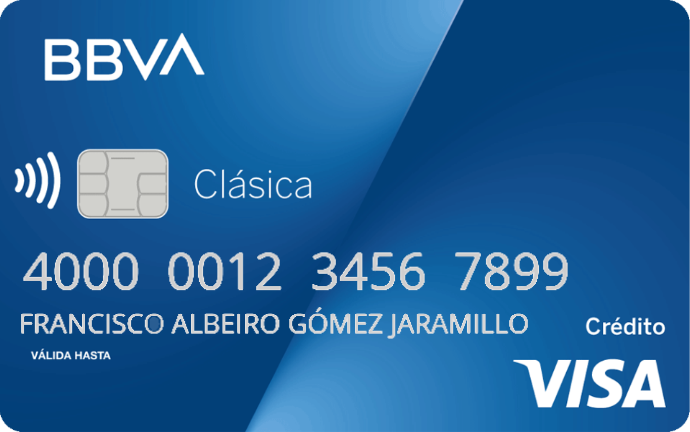

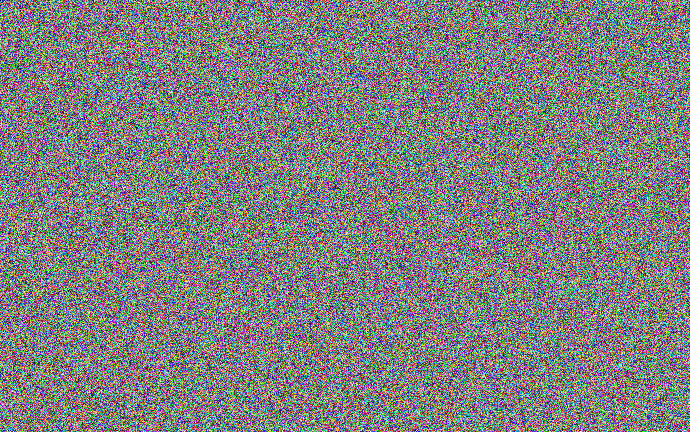

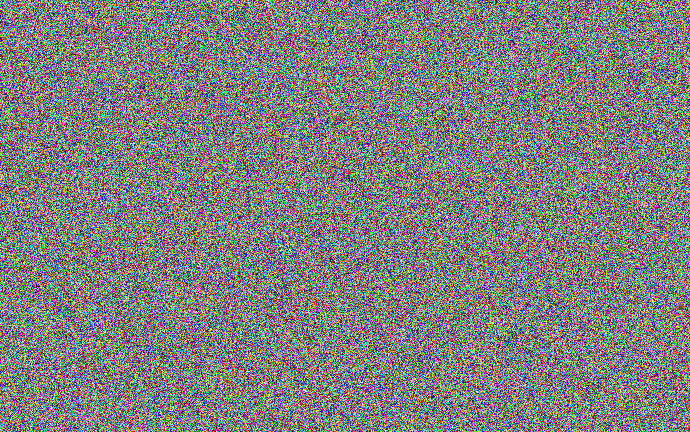

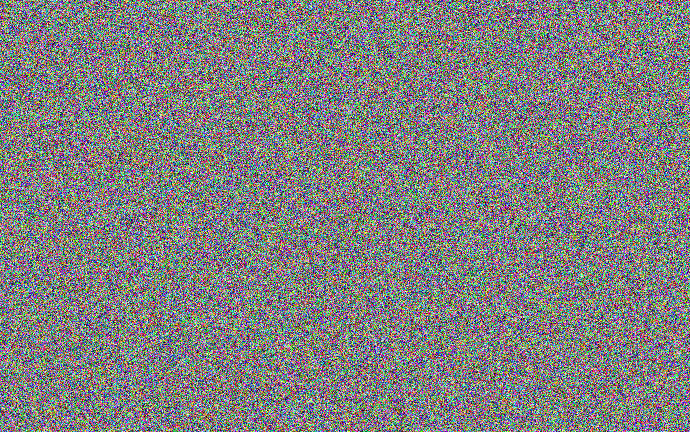

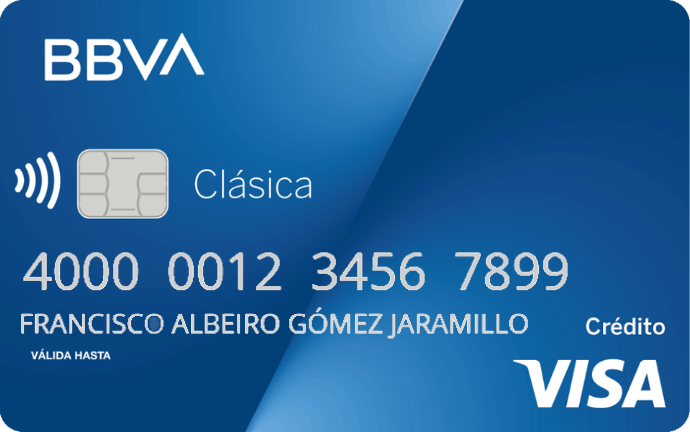

In [ ]:
from hashlib import sha256
from sympy import Matrix, lcm
from PIL import Image
from IPython.display import display
from IPython.display import Image as IM
import string
import sympy
import random
import sys
import numpy as np

#---Generación de la Semilla para la Clave A-----------------------------------#

def randomSeed(AKey):
  AHash = sha256(AKey.encode('utf-8')).hexdigest()
  ASeed = int(AHash, 16)
  return ASeed

#---Generación de la Matriz de la Clave A--------------------------------------#

def makeAMatrix(AKey):
  random.seed(randomSeed(AKey))
  while True:
    try:
      AMatrix = [[random.randint(-sys.maxsize - 1, sys.maxsize) for j in range(3)] for i in range(3)]
      Matrix(AMatrix).inv_mod(256)
      return AMatrix
    except:
      True
      #print("Reintentando conseguir matriz invertible.")

#---Generación de la Clave S1--------------------------------------------------#

def makeFirstSmoke(AMatrix):
  return Matrix(AMatrix).det() * Matrix(AMatrix).inv_mod(256).det()

#---Generación de la Matriz Conmutativa----------------------------------------#

def findASolution(AMatrix):
  A = AMatrix
  U = [[       0,           A[1][0],           A[2][0],          -A[0][1],         0,                 0,          -A[0][2],                 0,        0],
       [ A[0][1], A[1][1] - A[0][0],           A[2][1],	                0,	-A[0][1],	                0,	               0,	         -A[0][2],        0],
       [ A[0][2],           A[1][2], A[2][2] - A[0][0],	                0,         0,	         -A[0][1],                 0,	                0, -A[0][2]],
       [-A[1][0],                 0,	               0, A[0][0] - A[1][1],   A[1][0],	          A[2][0],	        -A[1][2],                 0,        0],
       [       0,          -A[1][0],                 0,	          A[0][1],         0,	          A[2][1],                 0,	         -A[1][2],	      0],
       [       0,                 0,	        -A[1][0],          	A[0][2],	 A[1][2], A[2][2] - A[1][1],	               0,                 0, -A[1][2]],
       [-A[2][0],                 0,	               0,          -A[2][1],         0,	                0, A[0][0] - A[2][2],           A[1][0],  A[2][0]],
       [       0,          -A[2][0],	               0,	                0,	-A[2][1],	                0,           A[0][1],	A[1][1] - A[2][2],	A[2][1]], 
       [       0,                 0,          -A[2][0],                 0,	       0,          -A[2][1],           A[0][2],	          A[1][2],        0]]

  U = Matrix(U)
  
  NewSols = []
  for sol in U.nullspace():
    m = lcm([val.q for val in sol])
    x = m * sol
    NewSols.append(x)

  return NewSols

#---Codificación de Números a Letras-------------------------------------------#

def encodeNumberToLetters(number):
  chars = []
  chars.extend(string.digits + string.ascii_letters)
  letters = ""
  while number > 0:
    INumber = number % len(chars)
    letters += chars[INumber]
    number //= len(chars)

  return letters

#---Codificación de Letras a Números-------------------------------------------#

def encodeLettersToNumber(letters):
  chars = []
  chars.extend(string.digits + string.ascii_letters)
  number = 0
  i = 0
  for a in letters:
    number += (len(chars) ** i ) * chars.index(a)
    i += 1

  return number

#---Generación de la Clave T---------------------------------------------------#

def makeTKey(TMatrix):
  TKey = ""
  for sol in TMatrix:
    for value in list(sol):
      if value >= 0:
        key = str(value)
        key = "0" + key
      else:
        key = str(value)[1:]
        key = "1" + key

      leng = len(key)
      leng = str(leng)
      TKey += str(len(leng)) + leng + key

  return encodeNumberToLetters(int(TKey))

#---Generación de la Matriz Solución de la Conmutatividad----------------------#

def makeTMatrix(TKey):
  TKey = str(encodeLettersToNumber(TKey))
  i = 0
  solCounter = 0
  TMatrix = []
  sol = []
  while i < len(TKey):
    ll = int(TKey[i])
    i += 1
    leng = int(TKey[i:i + ll])
    i += ll
    if int(TKey[i]) == 0:
      value = int(TKey[i + 1:i + leng])
    else:
      value = -int(TKey[i + 1:i + leng])
    
    i += leng
    sol.append(value)
    solCounter += 1
    if solCounter == 9:
      TMatrix.append(Matrix(sol))
      solCounter = 0
      sol = []

  return TMatrix

#---Generación de la Matriz B apartir de la Clave Personal B-------------------#

def createBMatrix(BSeed, TKey):
  random.seed(BSeed)

  NewSols = makeTMatrix(TKey)

  while True:
    try:
      LMatrix = []
      freeVariables = [random.randint(-sys.maxsize - 1, sys.maxsize) for i in range(3)]
      for i in range(9):
        cell = NewSols[0][i] * freeVariables[0] + NewSols[1][i] * freeVariables[1] + NewSols[2][i] * freeVariables[2]
        LMatrix.append(cell)

      BMatrix = [[LMatrix[i], LMatrix[i + 1], LMatrix[i + 2]] for i in range(0, 9, 3)]
      Matrix(BMatrix).inv_mod(256)
      return BMatrix
    except:
      True
      #print("Reintentando conseguir matriz invertible.")

#---Generación de la Clave S2--------------------------------------------------#

def makeSecondSmoke(BMatrix, S1Key):
  S1Key = encodeLettersToNumber(S1Key)
  return S1Key * Matrix(BMatrix).det() * Matrix(BMatrix).inv_mod(256).det()

#---Generación de la Clave B---------------------------------------------------#

def makeBKey(BMatrix):
  BKey = ""
  for row in BMatrix:
    for value in row:
      if value >= 0:
        key = str(value)
        key = "0" + key
      else:
        key = str(value)[1:]
        key = "1" + key

      leng = len(key)
      leng = str(leng)
      BKey += str(len(leng)) + leng + key
      
  return encodeNumberToLetters(int(BKey))

#---Generación de la Matriz B a partir de la Clave B---------------------------#

def makeBMatrix(BKey):
  BKey = str(encodeLettersToNumber(BKey))
  i = 0
  solCounter = 0
  BMatrix = []
  sol = []
  while i < len(BKey):
    ll = int(BKey[i])
    i += 1
    leng = int(BKey[i:i + ll])
    i += ll
    if int(BKey[i]) == 0:
      value = int(BKey[i + 1:i + leng])
    else:
      value = -int(BKey[i + 1:i + leng])
    
    i += leng
    sol.append(value)
    solCounter += 1
    if solCounter == 3:
      BMatrix.append(sol)
      solCounter = 0
      sol = []

  return BMatrix

#---Creación de la primera instancia de claves---------------------------------#

def firstKeyIteration(AKey):
  AMatrix = makeAMatrix(AKey)
  S1Value = makeFirstSmoke(AMatrix)

  if S1Value >= 0:
    S1Key = "0" + str(S1Value)
    S1Key = encodeNumberToLetters(int(S1Key))
  else:
    S1Key = "1" + str(S1Value)[1:]
    S1Key = encodeNumberToLetters(int(S1Key))

  TMatrix = findASolution(AMatrix)
  TKey = makeTKey(TMatrix)

  print("La clave pública T es:", end=" ")
  print(TKey)

  global gTKey
  global gS1Key

  gTKey = TKey

  print("La clave pública S1 es:", end=" ")
  print(S1Key)

  gS1Key = S1Key

#---Creación de la segunda instancia de claves---------------------------------#

def secondKeyIteration(TKey, S1Key, BTKey):
  BSeed = randomSeed(BTKey)
  BMatrix = createBMatrix(BSeed, TKey)
  BKey = makeBKey(BMatrix)
  S2Value = makeSecondSmoke(BMatrix, S1Key)

  if S2Value >= 0:
    S2Key = "0" + str(S2Value)
    S2Key = encodeNumberToLetters(int(S2Key))
  else:
    S2Key = "1" + str(S2Value)[1:]
    S2Key = encodeNumberToLetters(int(S2Key))

  global gBKey
  global gS2Key

  print("La clave privada B es:", end=" ")
  print(BKey)

  gBKey = BKey

  print("La clave pública S2 es:", end=" ")
  print(S2Key)

  gS2Key = S2Key

#---Algoritmo de Cifrado y Decifrado-------------------------------------------#

def cipherSmoker(message, matrix):
  message = [(row + random.randint(0, 255)) % 256 for row in message] 
  message = Matrix(message)
  result = message.transpose() * Matrix(matrix)
  newResult = [row % 256 for row in list(result)]
  return newResult

def cipherDirect(message, matrix):
  message = Matrix(message)
  result = message.transpose() * Matrix(matrix)
  newResult = [row % 256 for row in list(result)]
  return newResult

def decipherSmoker(message, matrix):
  message = Matrix(message)
  result = message.transpose() * matrix
  newResult = [(row - random.randint(0, 255)) % 256 for row in list(result)]
  return newResult

def decipherDirect(message, matrix):
  message = Matrix(message)
  result = message.transpose() * matrix
  newResult = [row % 256  for row in list(result)]
  return newResult

#---Función para mostrar imagen------------------------------------------------#

def showImage(path):
  print()
  display(IM(path))
  print()

#---Funciónes para cifrar y decifrar la imagen---------------------------------#

def cipherAImage(data, matrix, smoke):
  matrix = makeAMatrix(matrix)
  random.seed(smoke)
  enc = []
  for row in data:
    NRow = []
    for cell in row:
      NRow.append(cipherSmoker(cell, matrix))
    enc.append(NRow)
  return enc

def cipherBImage(data, matrix):
  matrix = makeBMatrix(matrix)
  enc = []
  for row in data:
    NRow = []
    for cell in row:
      NRow.append(cipherDirect(cell, matrix))
    enc.append(NRow)
  return enc

def decipherAImage(data, matrix):
  matrix = Matrix(makeAMatrix(matrix)).inv_mod(256)
  dec = []
  for row in data:
    NRow = []
    for cell in row:
      NRow.append(decipherDirect(cell, matrix))
    dec.append(NRow)
  return dec

def decipherBImage(data, matrix, smoke):
  matrix = Matrix(makeBMatrix(matrix)).inv_mod(256)
  random.seed(smoke)
  dec = []
  for row in data:
    NRow = []
    for cell in row:
      NRow.append(decipherSmoker(cell, matrix))
    dec.append(NRow)
  return dec

#---Selección de Claves Personales---------------------------------------------#

gTKey = ""
gS1Key = ""
gS2Key = ""
gBKey = ""

AKey = input("Inserte la Clave Personal A\n")

firstKeyIteration(AKey)

'''
TKey = input("Inserte la Clave T\n")
S1Key = input("Inserte la Clave S1\n")
'''

BTKey = input("Inserte una Clave Personal B\n")

secondKeyIteration(gTKey, gS1Key, BTKey)

#---Encriptación y Decifrado de Imágenes---------------------------------------#

fileName = input("Inserte el nombre del archivo\n")

# IMPORTANTE
# Las direcciones de los archivos pueden cambiar dependiendo del sistema
#   operativo que se utilice. En caso de Windows, deberá importarse la librería
#   os, para conseguir una dirección específica cerca al archivo .py

path = "/content/" + fileName + ".png"
path2 = "/content/" + fileName + "Enc1.png"
path3 = "/content/" + fileName + "Enc2.png"
path4 = "/content/" + fileName + "Dec1.png"
path5 = "/content/" + fileName + "Dec2.png"

image = Image.open(path)

ImageData = np.asarray(image)
showImage(path)

ImageEnc1 = cipherAImage(ImageData, AKey, gS2Key)
ImageEnc1 = np.asarray(ImageEnc1)

image2 = Image.fromarray(ImageEnc1.astype(np.uint8)).save(path2)
showImage(path2)

ImageEnc2 = cipherBImage(ImageEnc1, gBKey)
ImageEnc2 = np.asarray(ImageEnc2)

image3 = Image.fromarray(ImageEnc2.astype(np.uint8)).save(path3)
showImage(path3)

ImageDec1 = decipherAImage(ImageEnc2, AKey)
ImageDec1 = np.asarray(ImageDec1)

image4 = Image.fromarray(ImageDec1.astype(np.uint8)).save(path4)
showImage(path4)

ImageDec2 = decipherBImage(ImageDec1, gBKey, gS2Key)
ImageDec2 = np.asarray(ImageDec2)

image5 = Image.fromarray(ImageDec2.astype(np.uint8)).save(path5)
showImage(path5)


# <font color='LightSkyBlue'>**Conclusiones**</font>
Con lo realizado en esta segunda entrega, y lo planteado para la entrega final del proyecto, podemos concluir que la aritmética modular es una herramienta ideal para el propóstito planetado en este proyecto. Por otra parte, podemnos evidenciar la eficiencia del algoritmo implementado viendo los resultados obtenidos, lo cual también demuestra la utilidad de las propiedades como el inverso multpiplicativo al momento de utilizar los números en la criptografía.

# <font color='LightSkyBlue'>**Referencias**</font>

> [1] Reade, J. (1988). Modular Arithmetic and Cryptography. The Mathematical Gazette, 72(461), 198-202. https://doi.org/10.2307/3618250

> [2] Smart N.P. (2016) Modular Arithmetic, Groups, Finite Fields and Probability. In: Cryptography Made Simple. Information Security and Cryptography. Springer, Cham. https://doi.org/10.1007/978-3-319-21936-3_1 

> [3] Shyamsunder, S. & Kaliyaperumal, Ganesan. (2012). Image Encryption and Decryption Using Chaotic Maps and Modular Arithmetic. American Journal of Signal Processing. 1. 24-33. 10.5923/j.ajsp.20110101.05. https://www.researchgate.net/publication/271102202_Image_Encryption_and_Decryption_Using_Chaotic_Maps_and_Modular_Arithmetic

> [4] Evans, M., Tan, C., & Shaw, M. (2020). RSA Encryption. Retrieved 19 November 2020, from https://amsi.org.au/ESA_Senior_Years/PDF/Maths_delivers/Encryption5.pdf